Importing some packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import seaborn as sns
import json

%matplotlib inline 

# Notes:

* Reading excel file, skipping the first row, setting the header
* Dropping unnecessary columns
* Dropping level
* Transposing  

income_data = pd.read_excel("data/household_income.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)  

income_data = income_data[income_data.columns.drop(list(income_data.filter(regex='Error')))]  

income_data.columns = income_data.columns.droplevel(1)  

income_data.set_index('Unnamed: 0_level_0').T.reset_index()  


Creating some dataframes: covid cases, vaccine shots, weather

In [2]:
covid_cases = pd.read_csv('../data/COVID_CountByZipPerDate 03292021.csv')
print(covid_cases.head())
print(covid_cases.tail())

  Specimen Collection Date      Zip  Cases
0                 3/6/2020  37217.0      1
1                3/10/2020  37214.0      1
2                3/11/2020  37013.0      1
3                3/11/2020  37204.0      2
4                3/11/2020  37205.0      1
     Specimen Collection Date      Zip  Cases
8827                3/27/2021  37210.0      1
8828                3/27/2021  37211.0      1
8829                3/27/2021  37212.0      1
8830                3/27/2021  37214.0      2
8831                3/27/2021  37221.0      2


In [3]:
vacc_shots = pd.read_csv('../data/vaccine_with_protocol.csv')
print(vacc_shots.head())
print(vacc_shots.tail())

    vacc_date  zipcode  count_given  dose_nbr  protocol
0  2020-12-12  37215.0          1.0       1.0  two-shot
1  2020-12-14  37205.0          1.0       2.0  two-shot
2  2020-12-14  37215.0          1.0       1.0  two-shot
3  2020-12-15  37221.0          1.0       1.0  two-shot
4  2020-12-16  37215.0          1.0       1.0  two-shot
       vacc_date  zipcode  count_given  dose_nbr  protocol
6689  2021-04-07  37228.0          9.0       1.0  two-shot
6690  2021-04-07  37228.0          2.0       2.0  two-shot
6691  2021-04-07      NaN          8.0       1.0  two-shot
6692  2021-04-07      NaN          1.0       1.0  one-shot
6693  2021-04-07      NaN          7.0       2.0  two-shot


In [4]:
vacc_shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vacc_date    6694 non-null   object 
 1   zipcode      6462 non-null   float64
 2   count_given  6686 non-null   float64
 3   dose_nbr     6686 non-null   float64
 4   protocol     6694 non-null   object 
dtypes: float64(3), object(2)
memory usage: 261.6+ KB


In [5]:
nash_weather = pd.read_csv('../data/weather_stats.csv')

nash_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37056 entries, 0 to 37055
Data columns (total 68 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          37056 non-null  object 
 1   NAME             37056 non-null  object 
 2   LATITUDE         37056 non-null  float64
 3   LONGITUDE        37056 non-null  float64
 4   ELEVATION        37056 non-null  float64
 5   DATE             37056 non-null  object 
 6   AWND             412 non-null    float64
 7   AWND_ATTRIBUTES  412 non-null    object 
 8   DAPR             561 non-null    float64
 9   DAPR_ATTRIBUTES  561 non-null    object 
 10  EVAP             209 non-null    float64
 11  EVAP_ATTRIBUTES  209 non-null    object 
 12  MDPR             555 non-null    float64
 13  MDPR_ATTRIBUTES  555 non-null    object 
 14  MNPN             215 non-null    float64
 15  MNPN_ATTRIBUTES  215 non-null    object 
 16  MXPN             215 non-null    float64
 17  MXPN_ATTRIBU

C:\Users\tye64\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,11,15,17,19,23,29,31,39,41,43,49,51,53,55,57,59,61,63,65,67) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
nash_weather = nash_weather[['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'DATE', 'TAVG', 'TMAX', 'TMIN']]
nash_weather.describe()

,LATITUDE,LONGITUDE,TAVG,TMAX,TMIN
count,37056.000000,37056.000000,808.000000,7535.000000,7535.000000
mean,36.111538,-86.770498,59.696782,69.143729,47.397877
std,0.171133,0.257603,15.077935,16.661727,16.345183
min,35.719605,-87.364400,16.000000,13.000000,-99.000000
25%,35.976800,-86.910740,49.000000,58.000000,34.000000
50%,36.110790,-86.772900,60.000000,70.000000,47.000000
75%,36.222431,-86.571596,73.000000,83.000000,62.000000
max,36.538515,-86.306030,87.000000,99.000000,77.000000


In [7]:
nash_weather = nash_weather.rename({'TAVG': 'temp_avg', 'TMAX':'temp_max', 'TMIN':'temp_min'}, axis =1)
nash_weather.head()
nash_weather['DATE'] = pd.to_datetime(nash_weather['DATE'])

Renaming some columns in covid cases

In [8]:
covid_cases = covid_cases.rename(columns = {'Specimen Collection Date' : 'date', 'Zip':'zip','Cases':'cases'})
covid_cases.head()

,date,zip,cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1


Renaming columns in vacc shots

In [9]:
vacc_shots = vacc_shots.rename(columns = {'vacc_date': 'date', 'zipcode': 'zip', 'count_given':'vacc_given', 'dose_nbr':'dose_nbr', 'protocal':'protocal'})
vacc_shots.head()

,date,zip,vacc_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
1,2020-12-14,37205.0,1.0,2.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot


In [10]:
covid_cases['zip'] = covid_cases['zip'].astype('Int64')
covid_cases['zip'] = covid_cases['zip'].astype('str')
covid_cases['date'] = pd.to_datetime(covid_cases['date'])

In [11]:
vacc_shots['zip'] = vacc_shots['zip'].astype('Int64')
vacc_shots['zip'] = vacc_shots['zip'].astype('str')
vacc_shots['date'] = pd.to_datetime(vacc_shots['date'])

In [12]:
print(covid_cases.dtypes)
covid_cases.info

date     datetime64[ns]
zip              object
cases             int64
dtype: object


<bound method DataFrame.info of            date    zip  cases
0    2020-03-06  37217      1
1    2020-03-10  37214      1
2    2020-03-11  37013      1
3    2020-03-11  37204      2
4    2020-03-11  37205      1
...         ...    ...    ...
8827 2021-03-27  37210      1
8828 2021-03-27  37211      1
8829 2021-03-27  37212      1
8830 2021-03-27  37214      2
8831 2021-03-27  37221      2

[8832 rows x 3 columns]>

In [13]:
#group by zipcode to get total cases per zipcode
covid_group_zip = covid_cases.groupby(['zip'],as_index=False)['cases'].sum()
covid_group_zip

,zip,cases
0,37013,13354
1,37027,231
2,37069,16
3,37072,2984
4,37076,4279
5,37080,574
6,37115,4574
7,37138,2359
8,37189,479
9,37201,299


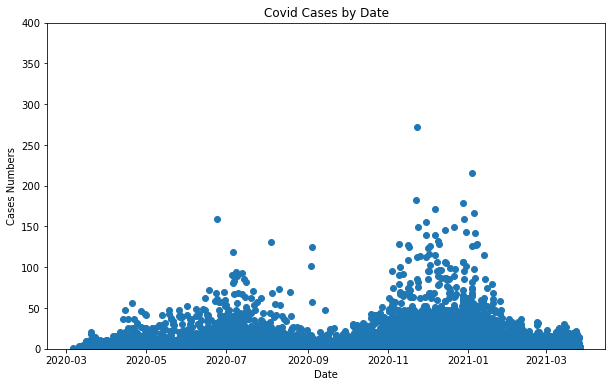

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(x = covid_cases['date'], y = covid_cases['cases'])
plt.xlabel('Date')
plt.ylabel('Cases Numbers')
plt.ylim(0, 400)
plt.title('Covid Cases by Date');

In [15]:
print(nash_weather.head())
nash_weather.info()

       STATION                             NAME   LATITUDE  LONGITUDE  \
0  US1TNCH0002  KINGSTON SPRINGS 0.3 ENE, TN US  36.098414 -87.096259   
1  US1TNCH0002  KINGSTON SPRINGS 0.3 ENE, TN US  36.098414 -87.096259   
2  US1TNCH0002  KINGSTON SPRINGS 0.3 ENE, TN US  36.098414 -87.096259   
3  US1TNCH0002  KINGSTON SPRINGS 0.3 ENE, TN US  36.098414 -87.096259   
4  US1TNCH0002  KINGSTON SPRINGS 0.3 ENE, TN US  36.098414 -87.096259   

        DATE  temp_avg  temp_max  temp_min  
0 2020-03-01       NaN       NaN       NaN  
1 2020-03-02       NaN       NaN       NaN  
2 2020-03-03       NaN       NaN       NaN  
3 2020-03-04       NaN       NaN       NaN  
4 2020-03-05       NaN       NaN       NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37056 entries, 0 to 37055
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    37056 non-null  object        
 1   NAME       37056 non-null  object    

In [16]:
nash_date_group = nash_weather.groupby('DATE')
temp_max_mean = nash_weather.groupby('DATE', as_index = False)['temp_max'].mean()
nash_weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,DATE,temp_avg,temp_max,temp_min
0,US1TNCH0002,"KINGSTON SPRINGS 0.3 ENE, TN US",36.098414,-87.096259,2020-03-01,NaN,NaN,NaN
1,US1TNCH0002,"KINGSTON SPRINGS 0.3 ENE, TN US",36.098414,-87.096259,2020-03-02,NaN,NaN,NaN
2,US1TNCH0002,"KINGSTON SPRINGS 0.3 ENE, TN US",36.098414,-87.096259,2020-03-03,NaN,NaN,NaN
3,US1TNCH0002,"KINGSTON SPRINGS 0.3 ENE, TN US",36.098414,-87.096259,2020-03-04,NaN,NaN,NaN
4,US1TNCH0002,"KINGSTON SPRINGS 0.3 ENE, TN US",36.098414,-87.096259,2020-03-05,NaN,NaN,NaN


In [53]:
temp_mean = nash_weather.groupby('DATE', as_index = False)['temp_avg'].mean()
print(temp_mean)
temp_mean['DATE'] = pd.to_datetime(temp_mean['DATE'])
temp_mean['DATE'] = temp_mean['DATE'].dt.normalize()
print(temp_mean)

          DATE  temp_avg
0   2020-03-01      50.0
1   2020-03-02      55.5
2   2020-03-03      60.0
3   2020-03-04      54.0
4   2020-03-05      54.0
..         ...       ...
407 2021-04-12      65.0
408 2021-04-13      63.0
409 2021-04-14      57.0
410 2021-04-15      54.5
411 2021-04-16      54.0

[412 rows x 2 columns]
          DATE  temp_avg
0   2020-03-01      50.0
1   2020-03-02      55.5
2   2020-03-03      60.0
3   2020-03-04      54.0
4   2020-03-05      54.0
..         ...       ...
407 2021-04-12      65.0
408 2021-04-13      63.0
409 2021-04-14      57.0
410 2021-04-15      54.5
411 2021-04-16      54.0

[412 rows x 2 columns]


In [18]:
temp_max = nash_weather.groupby('DATE', as_index = False)['temp_max'].mean()
print(temp_max)
temp_max['DATE'] = pd.to_datetime(temp_max['DATE'])
print(temp_mean)

          DATE   temp_max
0   2020-03-01  53.833333
1   2020-03-02  67.166667
2   2020-03-03  64.277778
3   2020-03-04  65.315789
4   2020-03-05  64.157895
..         ...        ...
407 2021-04-12  74.071429
408 2021-04-13  76.916667
409 2021-04-14  71.076923
410 2021-04-15  62.666667
411 2021-04-16  62.437500

[412 rows x 2 columns]
          DATE  temp_avg
0   2020-03-01      50.0
1   2020-03-02      55.5
2   2020-03-03      60.0
3   2020-03-04      54.0
4   2020-03-05      54.0
..         ...       ...
407 2021-04-12      65.0
408 2021-04-13      63.0
409 2021-04-14      57.0
410 2021-04-15      54.5
411 2021-04-16      54.0

[412 rows x 2 columns]


In [19]:
temp_min = nash_weather.groupby('DATE', as_index = False)['temp_min'].mean()
print(temp_min)
temp_min['DATE'] = pd.to_datetime(temp_min['DATE'])
print(temp_min)

          DATE   temp_min
0   2020-03-01  28.833333
1   2020-03-02  36.611111
2   2020-03-03  48.166667
3   2020-03-04  40.631579
4   2020-03-05  40.842105
..         ...        ...
407 2021-04-12  47.285714
408 2021-04-13  49.416667
409 2021-04-14  50.000000
410 2021-04-15  47.066667
411 2021-04-16  38.062500

[412 rows x 2 columns]
          DATE   temp_min
0   2020-03-01  28.833333
1   2020-03-02  36.611111
2   2020-03-03  48.166667
3   2020-03-04  40.631579
4   2020-03-05  40.842105
..         ...        ...
407 2021-04-12  47.285714
408 2021-04-13  49.416667
409 2021-04-14  50.000000
410 2021-04-15  47.066667
411 2021-04-16  38.062500

[412 rows x 2 columns]


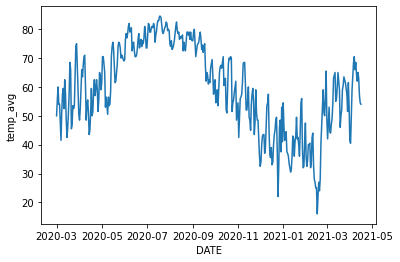

In [20]:
ax = sns.lineplot(x='DATE', y='temp_avg', data=temp_mean)

In [123]:
covid_group_date = covid_cases.groupby('date', as_index = False)['cases'].sum()
covid_group_date['date'] = pd.to_datetime(covid_group_date['date'])
covid_group_date['date'] = covid_group_date['date'].dt.normalize()
covid_group_date.reset_index()
print(covid_group_date)

          date  cases
0   2020-03-06      1
1   2020-03-10      1
2   2020-03-11     11
3   2020-03-12      8
4   2020-03-13     18
..         ...    ...
379 2021-03-23    154
380 2021-03-24    177
381 2021-03-25    137
382 2021-03-26     96
383 2021-03-27     18

[384 rows x 2 columns]


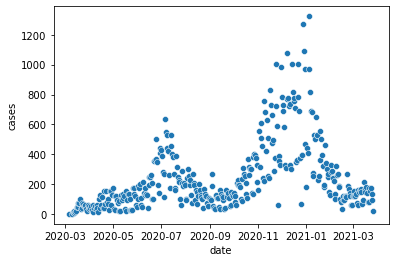

In [22]:
ax = sns.scatterplot(x='date', y='cases', data=covid_group_date)

# Avg temp is the line plot on top of covid cases as bar plot

In [105]:
sns.reset_orig()

In [107]:
print(covid_group_date['date'].min())
print(covid_group_date['date'].max())

print(temp_mean['DATE'].min())
print(temp_mean['DATE'].max())

2020-03-06 00:00:00
2021-03-27 00:00:00
2020-03-01 00:00:00
2021-04-16 00:00:00


No handles with labels found to put in legend.


''

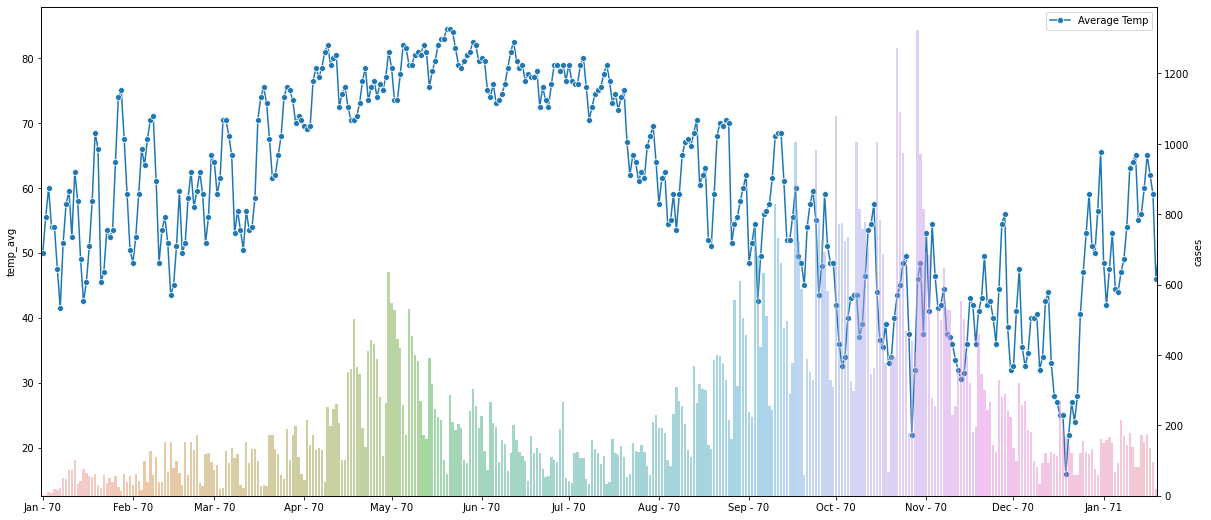

In [120]:
fig, ax1 = plt.subplots(figsize=(20,9))

sns.lineplot(data =temp_mean['temp_avg'], marker='o', sort = False,label='Average Temp',ax=ax1)
ax2 = ax1.twinx()
sns.barplot(data = covid_group_date, x=covid_group_date.index.values, y='cases', alpha=0.5,ax=ax2)

ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b - %y'))

ax.legend()


plt.savefig('../assets/covid_weather.png')
;

No handles with labels found to put in legend.


''

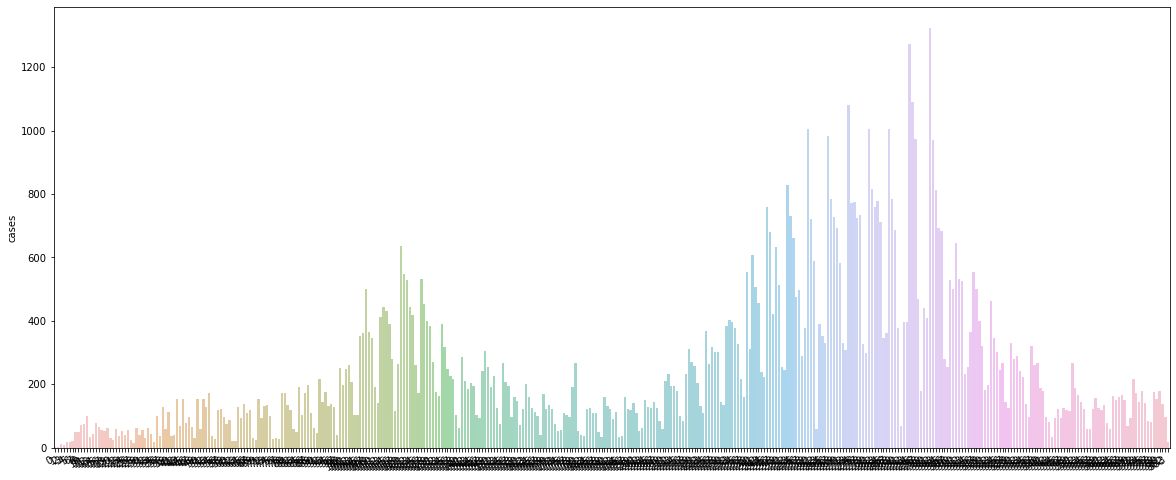

In [124]:
fig, ax1 = plt.subplots(figsize=(20,9))


sns.barplot(data = covid_group_date, x=covid_group_date.index.values, y='cases', alpha=0.5)
fig.autofmt_xdate()

ax.legend()


# plt.savefig('../assets/covid_weather.png')
;

In [94]:
cases_merge_temp['date'].range()

AttributeError: 'Series' object has no attribute 'range'

In [72]:
cases_merge_temp['month_year'] = pd.to_datetime(cases_merge_temp['date']).dt.strftime('%b - %y')
cases_merge_temp.head()

,date,cases,temp_avg,temp_max,temp_min,month_year
0,2020-03-06,1,47.5,62.705882,40.352941,Mar - 20
1,2020-03-10,1,59.5,65.842105,49.052632,Mar - 20
2,2020-03-11,11,52.5,66.263158,43.473684,Mar - 20
3,2020-03-12,8,62.5,63.052632,45.052632,Mar - 20
4,2020-03-13,18,58.0,71.578947,52.736842,Mar - 20


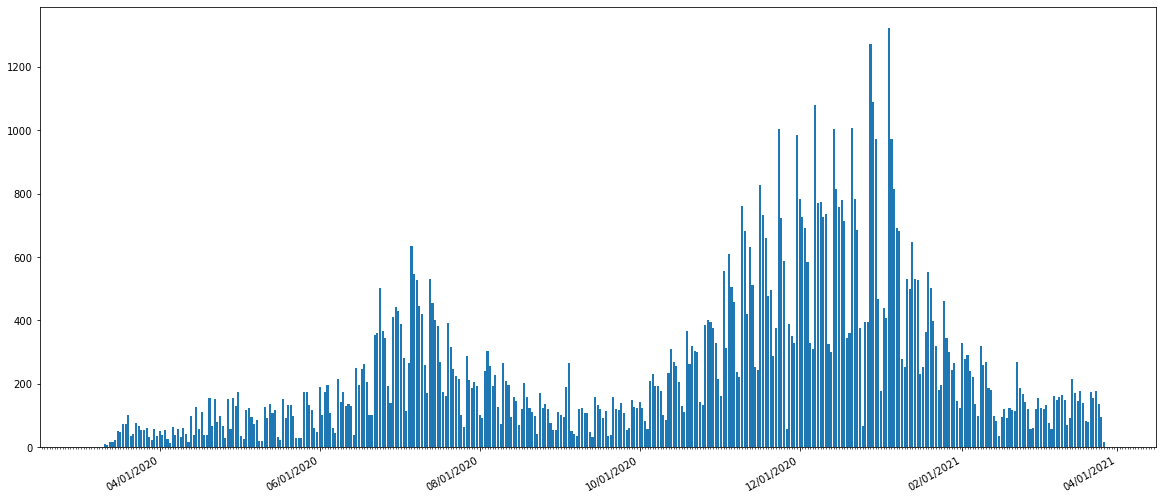

In [89]:
fig, ax = plt.subplots(figsize=(20,9))

cases_merge_temp['DOB'] = pd.to_datetime(cases_merge_temp['date']).dt.strftime('%Y-%m-%d')

dates=[dt.datetime.strptime(d,'%Y-%m-%d').date() for d in cases_merge_temp['DOB']]

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.bar(dates,cases_merge_temp['cases'],align='center')
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.gcf().autofmt_xdate()
plt.show()

In [24]:
sns.barplot(data = covid_group_date, x='date', y='cases', alpha=0.5, ax=ax2)

<AxesSubplot:label='7fc665b4-ac12-4c1d-9e65-b76c7a577dae', xlabel='date', ylabel='cases'>

In [25]:
cases_merge_temp = covid_group_date.merge(temp_mean, left_on='date', right_on='DATE', how='left')
cases_merge_temp = cases_merge_temp.merge(temp_max, left_on='date', right_on='DATE', how='left')
cases_merge_temp = cases_merge_temp.merge(temp_min, left_on='date', right_on='DATE', how='left')


In [26]:
cases_merge_temp = cases_merge_temp[['date', 'cases', 'temp_avg', 'temp_max', 'temp_min']]

In [30]:
cases_merge_temp.corr()

,cases,temp_avg,temp_max,temp_min
cases,1.000000,-0.302521,-0.276429,-0.308928
temp_avg,-0.302521,1.000000,0.963877,0.949498
temp_max,-0.276429,0.963877,1.000000,0.927873
temp_min,-0.308928,0.949498,0.927873,1.000000


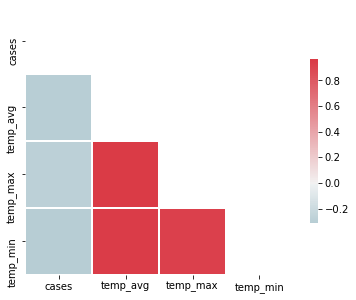

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))

corr = cases_merge_temp.corr()
# create a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask = mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [28]:
cases_merge_temp

,date,cases,temp_avg,temp_max,temp_min
0,2020-03-06,1,47.5,62.705882,40.352941
1,2020-03-10,1,59.5,65.842105,49.052632
2,2020-03-11,11,52.5,66.263158,43.473684
3,2020-03-12,8,62.5,63.052632,45.052632
4,2020-03-13,18,58.0,71.578947,52.736842
...,...,...,...,...,...
379,2021-03-23,154,60.5,69.312500,47.714286
380,2021-03-24,177,63.5,66.923077,54.384615
381,2021-03-25,137,62.5,75.285714,51.071429
382,2021-03-26,96,61.5,72.142857,48.642857


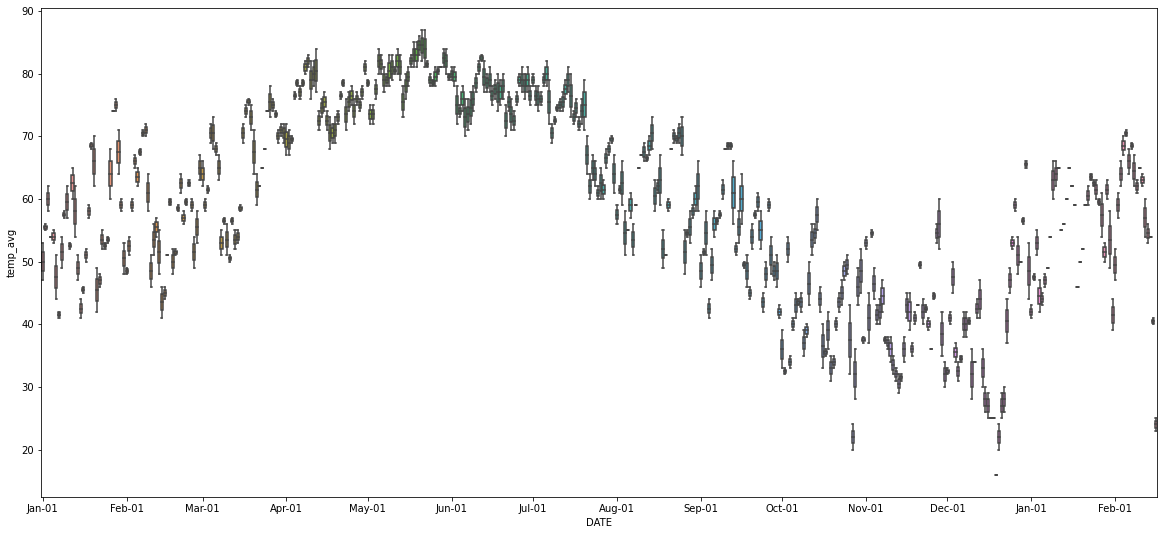

In [29]:
fig, ax = plt.subplots(figsize=(20,9))
ax = sns.boxplot(x="DATE", y="temp_avg", data=nash_weather)

ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'));

events = {'Name': ['Memorial Day', 'Labor Day', 'Thanksgiving', 'Christmas'],
          'Date': ['2020-05-25','2020-09-07','2020-11-25','2020-12-25'],
          'Count':[1,1,1,1]
         }

events_df = pd.DataFrame(events, columns = ['Name', 'Date', 'Count'])
events_df['Date'] = pd.to_datetime(events_df['Date'])

events_df['Date'].dtype



covid_group_date = covid_cases.groupby('date', as_index = False)['cases'].sum()
covid_group_date['date'].dtype


# create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(20,9))

# make a plot
ax.plot(covid_group_date.date, covid_group_date.cases, color="blue", alpha=0.5, marker = 'o')
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("cases",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.bar(events_df.Date, events_df["Count"], color=['red', 'green', 'orange', 'black'], width=1.5 )
ax2.legend()

ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

fig, ax = plt.subplots(figsize=(20,9))

sns.barplot(data = events_df,x='Date',y='Count', hue = 'Name', ax=ax)
ax2 = ax.twinx()
sns.barplot(data = covid_group_date, x='date', y='cases', alpha=0.5, ax = ax2)

ax2.xaxis.set_major_locator(mdates.DayLocator(bymonthday=1))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
;

## Reading Metadata function. From Joshua Rio-Ross
Basically, each table’s metadata.json is a dictionary with subdictionaries (as I’m sure you already saw), so I wrote a function that drills down to the right depth and gets each column name and stores it in a list in order, then finally it uses that list to rename the columns in the geodataframe/dataframe.  

One important thing: The tablename is the Census Reporter name that you see in the top left part of the page and that’s at the beginning of all the column names. So it’s a string that’s something like “B09001” or whatever.  



def metarename(file, metadata, tablename):
    """Given a Census Reporter file and its metadata, rename all imported DataFrame columns."""
    name_list = ["geoid", "zip"]
    for i in metadata["tables"][tablename]["columns"].items():
        col_name = i[1]["name"]
        col_name_error = i[1]["name"]+" error"
        name_list.append(col_name)
        name_list.append(col_name_error)
    name_list.append("geometry")
    file.columns = name_list
    return file

# Read in GeoDataFrame from geojson
eth_geo_df = gpd.read_file('../data/ethnicity_geojson/ehtnicity_geo.geojson')
# Read in metadata DataFrame from json using json package
er_md = open('../data/ethnicity_geojson/metadata.json')
eth_race_meta = json.load(er_md)
# Run function using table name "B03002"
fdf = metarename(eth_geo_df, eth_race_meta, "B03002")

fdf['zip'].value_counts